# Setup

In [1]:
import pandas as pd
import json
import codecs
import itertools
import numpy as np
pd.set_option('display.max_columns', None)

In [188]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [118]:
from sklearn import linear_model

In [119]:
from sklearn import datasets

In [311]:
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer

In [324]:
import ast

In [542]:
from sklearn.linear_model import LogisticRegression

# File Import


In [16]:
df_draft = pd.read_csv('./data/draft.csv')
df_ratings= pd.read_csv('./data/ratings.csv')
df_stats = pd.read_csv('./data/stats.csv')
df_born = pd.read_csv('./data/born.csv')
df_weight = pd.read_csv('./data/weight.csv')
df_awards = pd.read_csv('./data/awards.csv')

# Exploration

## highest ewa seasons

In [14]:
df_stats.sort_values('ewa', ascending=False)[0:10]#[['pid', 'ewa', 'season']]

,ast,astp,ba,blk,blkp,drb,drbp,drtg,dws,ewa,fg,fgAtRim,fgLowPost,fgMidRange,fga,fgaAtRim,fgaLowPost,fgaMidRange,ft,fta,gp,gs,min,orb,orbp,ortg,ows,per,pf,pid,playoffs,pm,pts,season,stl,stlp,tid,tov,tp,tpa,trbp,usgp,yearsWithTeam
43462,606.0,31.051619,113.0,152.0,3.839306,890.0,26.717965,90.974571,10.019286,45.537804,903.0,259.0,291.0,5.0,1775.0,344.0,457.0,21.0,1079.0,1186.0,82.0,82.0,3486.088301,335.0,11.652336,142.193625,31.234491,43.870090,107.0,4700,False,1665.0,3233.0,2089.0,285.0,3.988281,16.0,287.0,348.0,953.0,19.738797,31.743272,12.0
43450,316.0,16.583745,121.0,215.0,5.567840,817.0,26.010704,89.990810,9.743072,44.342036,962.0,332.0,300.0,2.0,1719.0,441.0,471.0,5.0,904.0,1007.0,82.0,82.0,3316.918047,318.0,11.737560,143.478578,28.967139,44.638218,91.0,4700,False,2082.0,3156.0,2083.0,262.0,3.886820,16.0,234.0,328.0,802.0,19.400828,31.160033,6.0
43458,413.0,19.494516,94.0,152.0,3.754810,934.0,28.901314,90.957402,10.017884,41.930327,932.0,283.0,328.0,2.0,1681.0,381.0,496.0,3.0,895.0,1042.0,82.0,82.0,3448.707900,350.0,12.302719,141.925115,28.108084,41.597657,144.0,4700,False,2031.0,3078.0,2087.0,277.0,3.914506,16.0,255.0,319.0,801.0,21.130284,29.873536,10.0
43460,424.0,24.013164,89.0,152.0,4.268408,793.0,27.126050,91.985140,8.558772,36.430955,777.0,241.0,259.0,5.0,1504.0,311.0,418.0,18.0,834.0,930.0,75.0,75.0,3121.665638,281.0,10.601531,137.053568,23.020003,40.371774,92.0,4700,False,1504.0,2660.0,2088.0,244.0,3.837917,16.0,257.0,272.0,757.0,19.268204,29.918455,11.0
52006,729.0,36.777876,116.0,86.0,2.425467,551.0,18.362683,89.158340,9.770904,35.777871,799.0,175.0,96.0,103.0,1710.0,270.0,171.0,279.0,530.0,563.0,82.0,82.0,3195.834785,164.0,5.881385,139.457153,24.424133,38.877831,32.0,5590,False,1900.0,2553.0,2097.0,309.0,4.747999,12.0,168.0,425.0,990.0,12.350776,28.497325,7.0
1693,170.0,8.863377,120.0,169.0,4.332382,616.0,18.752811,90.946817,9.494860,35.301663,990.0,228.0,73.0,199.0,2037.0,313.0,138.0,457.0,611.0,654.0,82.0,82.0,3390.664753,148.0,5.049067,134.044119,22.170016,37.208714,66.0,160,False,1690.0,3081.0,2022.0,230.0,3.352974,3.0,110.0,490.0,1129.0,12.290713,31.211601,5.0
43456,276.0,14.698673,113.0,160.0,4.065111,821.0,26.051082,95.561910,7.606011,34.599907,789.0,244.0,276.0,3.0,1589.0,348.0,467.0,9.0,828.0,957.0,82.0,82.0,3393.460010,336.0,11.627357,133.213138,21.743130,36.667590,125.0,4700,False,812.0,2672.0,2086.0,250.0,3.698151,16.0,208.0,266.0,765.0,19.151707,28.893235,9.0
59926,641.0,35.857572,106.0,73.0,1.939432,437.0,14.844734,103.576735,3.825775,33.960714,858.0,221.0,112.0,128.0,1791.0,306.0,224.0,288.0,528.0,607.0,80.0,80.0,3128.880210,143.0,5.245201,135.259891,23.192177,37.770553,30.0,6420,False,941.0,2641.0,2107.0,200.0,3.197062,6.0,145.0,397.0,973.0,10.229084,30.945479,2.0
43972,475.0,26.926713,91.0,212.0,5.714508,499.0,17.136834,98.315639,6.251141,33.728338,730.0,266.0,153.0,23.0,1435.0,358.0,276.0,79.0,754.0,846.0,82.0,82.0,3150.375774,191.0,6.754333,141.447167,23.060983,37.949156,46.0,4752,False,961.0,2502.0,2085.0,193.0,3.066103,11.0,180.0,288.0,722.0,12.021595,27.249941,7.0
59931,762.0,45.544532,97.0,93.0,2.556870,503.0,17.365977,98.358267,6.122410,33.585588,851.0,178.0,126.0,107.0,1878.0,240.0,258.0,287.0,501.0,568.0,79.0,79.0,3129.106615,165.0,5.940872,131.702764,21.657500,37.467375,42.0,6420,False,919.0,2643.0,2110.0,203.0,3.228662,6.0,189.0,440.0,1093.0,11.773336,32.190049,5.0


## highest ovr seasons

In [309]:
df_ewa_ratings.sort_values('ovr', ascending=False)[0:10][['pid', 'ovr','ewa', 'season']]

,pid,ovr,ewa,season
43462,4700.0,85.0,45.537804,2089
43463,4700.0,85.0,6.073012,2089
43460,4700.0,84.0,36.430955,2088
43461,4700.0,84.0,8.576127,2088
59928,6420.0,84.0,15.381799,2108
59932,6420.0,84.0,2.274535,2110
59931,6420.0,84.0,33.585588,2110
43450,4700.0,83.0,44.342036,2083
43979,4752.0,83.0,1.063995,2088
43451,4700.0,83.0,9.335830,2083


# Transform DF

In [378]:
df_stats['ws'] = df_stats['ows'] + df_stats['dws']

In [379]:
df_ratings['skills'] = df_ratings['skills'].apply(lambda x: ast.literal_eval(x))

In [380]:
mlb = MultiLabelBinarizer()
df_one_hot_skills = pd.DataFrame(
     mlb.fit_transform(df_ratings['skills']),
     columns=mlb.classes_, 
     index=df_ratings.index)

In [381]:
df_ratings = df_ratings.join(df_one_hot_skills)

In [382]:
df_ewa_ratings = pd.merge(
        df_stats[['ewa', 'pid', 'season', 'ows', 'dws', 'ws']], 
        df_ratings, 
        left_on=['pid', 'season'],
        right_on=['pid', 'season'])

In [383]:
cols_to_drop = ['skills', 'pos', 'season', 'fuzz', 'ows', 'dws', 'ws', 'ewa', 'pot']

In [384]:
for col in df_ewa_ratings.drop(cols_to_drop, axis=1):
    df_ewa_ratings[col] = df_ewa_ratings[col].apply(lambda x: float(x))

# Calculate Correlation

## function definitions

In [350]:
def calc_corr(df, corr_col):
    srs_corrs = df_ewa_ratings.drop(cols_to_drop, axis=1).corrwith(df_ewa_ratings[corr_col])
    return srs_corrs.sort_values(ascending=False)

## ewa

In [354]:
calc_corr(df_ewa_ratings, 'ewa')

ovr     0.599303
oiq     0.531415
diq     0.473994
endu    0.437431
stre    0.417382
drb     0.417104
pss     0.409620
Ps      0.406423
tp      0.399021
ft      0.390366
3       0.387724
fg      0.382489
Dp      0.374406
dnk     0.365901
Di      0.354688
reb     0.315888
B       0.313258
A       0.311881
ins     0.301728
R       0.212293
spd     0.205915
Po      0.200125
jmp     0.168895
hgt     0.004508
pid    -0.016163
dtype: float64

## ows

In [355]:
calc_corr(df_ewa_ratings, 'ows')

ovr     0.530083
oiq     0.518227
drb     0.434404
Ps      0.429179
pss     0.399555
tp      0.386359
ft      0.379283
3       0.378334
diq     0.366891
endu    0.365580
fg      0.357996
Dp      0.323012
B       0.313114
stre    0.304598
dnk     0.274499
A       0.267576
Di      0.234886
reb     0.227271
spd     0.199905
jmp     0.162685
ins     0.152002
R       0.122251
Po      0.099348
pid    -0.015879
hgt    -0.055959
dtype: float64

## dws

In [356]:
calc_corr(df_ewa_ratings, 'dws')

ovr     0.540396
diq     0.489670
stre    0.430957
oiq     0.422997
endu    0.396033
dnk     0.385879
Di      0.375143
reb     0.346751
ins     0.323833
R       0.285331
Po      0.250842
pss     0.248885
drb     0.248302
Dp      0.247657
ft      0.236518
tp      0.236022
fg      0.234409
A       0.213614
hgt     0.167085
3       0.164088
B       0.137324
Ps      0.137312
spd     0.117048
jmp     0.089531
pid    -0.016249
dtype: float64

## ws

In [357]:
calc_corr(df_ewa_ratings, 'ws')

ovr     0.581133
oiq     0.528140
diq     0.446143
endu    0.409652
drb     0.402354
stre    0.379670
pss     0.377862
tp      0.363618
ft      0.358790
Ps      0.356497
fg      0.342893
dnk     0.341207
3       0.330609
Dp      0.323116
Di      0.309038
reb     0.292855
B       0.274195
A       0.270875
ins     0.230775
R       0.195055
spd     0.186213
Po      0.165716
jmp     0.149368
hgt     0.023772
pid    -0.017431
dtype: float64

# Linear Regression

## function definitions

In [362]:
def calc_lm_coef(df, cols_to_drop, coef_col):
    lm = linear_model.LinearRegression()
    X = df.drop(cols_to_drop, axis = 1)
    y = df[coef_col]
    model = lm.fit(X,y)
    lm.predict(X)
    df_coef = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
    df_coef.columns = ['feature', 'coef']
    df_coef['coef'] = df_coef['coef'].apply(lambda x: round(x, 4))
    return df_coef.sort_values('coef')

## ewa

In [364]:
calc_coef(df_ewa_ratings, cols_to_drop, 'ewa')

,feature,coef
11,ovr,-0.4532
0,pid,0.0000
15,stre,0.0117
5,fg,0.0207
8,ins,0.0252
4,endu,0.0285
6,ft,0.0322
13,reb,0.0386
9,jmp,0.0596
12,pss,0.0604


## ows

In [365]:
calc_coef(df_ewa_ratings, cols_to_drop, 'ows')

,feature,coef
11,ovr,-0.2684
22,Po,-0.0470
8,ins,-0.0104
5,fg,-0.0013
0,pid,0.0000
15,stre,0.0126
4,endu,0.0162
13,reb,0.0197
1,diq,0.0222
6,ft,0.0255


## dws

In [366]:
calc_coef(df_ewa_ratings, cols_to_drop, 'dws')

,feature,coef
19,B,-0.0401
23,Ps,-0.0202
17,3,-0.0130
10,oiq,-0.0056
12,pss,-0.0042
16,tp,-0.0041
8,ins,-0.0027
3,drb,-0.0011
6,ft,-0.0010
15,stre,-0.0007


## ws

In [367]:
calc_coef(df_ewa_ratings, cols_to_drop, 'ws')

,feature,coef
11,ovr,-0.2222
8,ins,-0.0130
5,fg,-0.0013
0,pid,0.0000
15,stre,0.0119
4,endu,0.0192
13,reb,0.0231
12,pss,0.0234
6,ft,0.0245
9,jmp,0.0345


# Logistic Regression

In [ ]:
# done with the intent of identifying the characteristics that lead to certain 

## define function

In [629]:
def calc_lr_coef(df, cols_to_drop, coef_col):
    lr = LogisticRegression()
    lr.fit(df.drop(cols_to_drop, axis=1), df_ewa_ratings[coef_col])
    return pd.concat([pd.DataFrame(df.drop(cols_to_drop, axis=1).columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)


## define inputs

In [630]:
log_cols_to_drop = cols_to_drop
log_cols_to_drop.extend(['Ps', '3', 'ovr', 'A', 'B', 'Di', 'Dp', 'Po', 'R'])

In [558]:
log_cols_to_drop = cols_to_drop

In [632]:
log_cols_to_drop.extend(['Ps', '3', 'ovr', 'A', 'B', 'Di', 'Dp', 'Po', 'R', 'ps_sum'])

## 'Ps'

In [634]:
calc_lr_coef(df_ewa_ratings, log_cols_to_drop, 'Ps')

,0,0
0,pid,-0.000113
1,diq,0.002695
2,dnk,0.001075
3,drb,-0.002507
4,endu,0.027982
5,fg,-0.014948
6,ft,-0.012257
7,hgt,-0.101087
8,ins,-0.020409
9,jmp,-0.025119


## 'Di'

In [635]:
calc_lr_coef(df_ewa_ratings, log_cols_to_drop, 'Di')

,0,0
0,pid,-0.000063
1,diq,0.114460
2,dnk,-0.009948
3,drb,-0.057046
4,endu,0.023402
5,fg,-0.012977
6,ft,0.000457
7,hgt,0.031469
8,ins,-0.013130
9,jmp,0.007316


## Dp

In [638]:
calc_lr_coef(df_ewa_ratings, log_cols_to_drop, 'Dp')

,0,0
0,pid,-0.000073
1,diq,0.084482
2,dnk,0.001108
3,drb,-0.023612
4,endu,0.019742
5,fg,-0.007524
6,ft,-0.004843
7,hgt,-0.055507
8,ins,-0.024301
9,jmp,-0.000167


## '3'


In [637]:
calc_lr_coef(df_ewa_ratings, log_cols_to_drop, '3')

,0,0
0,pid,-0.000051
1,diq,0.006674
2,dnk,0.006417
3,drb,-0.027872
4,endu,0.017492
5,fg,-0.012707
6,ft,-0.008537
7,hgt,-0.056277
8,ins,-0.003709
9,jmp,-0.008906


In [581]:
df_ewa_ratings['ps_sum'] = 0.5 * df_ewa_ratings['oiq'] + df_ewa_ratings['pss']

In [628]:
df_ewa_ratings[(df_ewa_ratings['oiq'] > 70) & (df_ewa_ratings['ps_sum'] > 90) & (df_ewa_ratings['pss'] > 53)][['oiq', 'pss', 'Ps', 'drb', 'ps_sum']].sort_values('pss')

,oiq,pss,Ps,drb,ps_sum
72250,78.0,54.0,0.0,63.0,93.0
110674,75.0,54.0,0.0,55.0,91.5
110673,75.0,54.0,0.0,55.0,91.5
57043,75.0,54.0,0.0,51.0,91.5
72249,78.0,54.0,0.0,63.0,93.0
110670,75.0,54.0,0.0,54.0,91.5
110669,75.0,54.0,0.0,54.0,91.5
57046,75.0,54.0,0.0,50.0,91.5
30129,71.0,55.0,0.0,56.0,90.5
32054,72.0,55.0,0.0,46.0,91.0


In [582]:
df_ewa_ratings[(df_ewa_ratings['pss'] <57) & (df_ewa_ratings['Ps'] == 1)][['Ps', 'drb','oiq', 'pss', 'ps_sum']].sort_values('oiq')

,Ps,drb,oiq,pss,ps_sum
26816,1.0,78.0,65.0,56.0,88.5
26817,1.0,78.0,65.0,56.0,88.5
79013,1.0,78.0,67.0,56.0,89.5
79012,1.0,78.0,67.0,56.0,89.5
807,1.0,75.0,70.0,54.0,89.0
808,1.0,75.0,70.0,54.0,89.0
25968,1.0,72.0,71.0,56.0,91.5
25969,1.0,72.0,71.0,56.0,91.5
25972,1.0,72.0,71.0,55.0,90.5
53647,1.0,66.0,71.0,56.0,91.5


In [570]:
df_ewa_ratings[df_ewa_ratings['Ps'] == 1]['pss'].min()

54.0

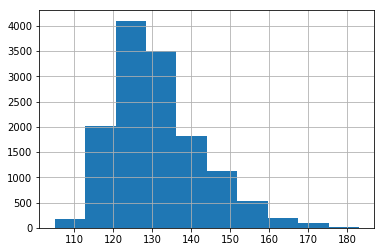

In [569]:
df_ewa_ratings[df_ewa_ratings['Ps'] == 1]['ps_sum'].hist()

# plots

In [371]:
df_ratings.columns

Index(['diq', 'dnk', 'drb', 'endu', 'fg', 'ft', 'fuzz', 'hgt', 'ins', 'jmp',
       'oiq', 'ovr', 'pos', 'pot', 'pss', 'reb', 'season', 'skills', 'spd',
       'stre', 'tp', 'pid'],
      dtype='object')

## ovr vs ewa

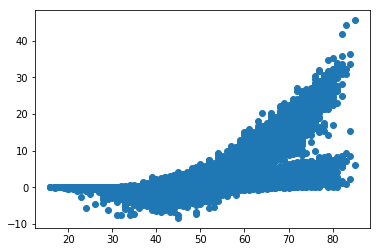

In [280]:
plt.scatter(df_ewa_ratings['ovr'], df_ewa_ratings['ewa'])

## ovr vs dws

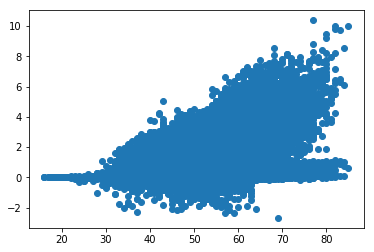

In [306]:
plt.scatter(df_ewa_ratings['ovr'], df_ewa_ratings['dws'])

## ovr vs ws

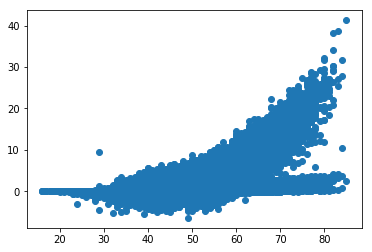

In [302]:
plt.scatter(df_ewa_ratings['ovr'], df_ewa_ratings['ws'])